# Heart Disease Data Analysis using Python

This project uses a sample dataset obtained from Kaggle, which contains health-related data such as age, cholesterol levels, chest pain type, and other clinical factors that may contribute to heart disease.

The objective of this project is to:
- Explore and understand the dataset structure
- Analyze key features that may indicate heart disease risk
- Visualize patterns and correlations between variables
- Derive meaningful insights for early identification of at-risk individuals

## Tools & Libraries Used
- Python  
- Pandas  
- Numpy  
- Matplotlib  
- Seaborn  
- Jupyter Notebook
- MySQL

## 1. Import Libraries + Load Data

In [2]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plot
import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')

## 2. Data Exploration

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Checking for missing values and data types

In [11]:
# Checking missing or null values
df.isnull().sum().sum()

0

### Insights:
- No null or missing values were found.

In [10]:
# Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Insights:
- After inspecting the dataset, all columns were confirmed to have appropriate data types suitable for further analysis.

## 3. Distribution Analysis

### Analyzing Age column

Text(0, 0.5, 'Density')

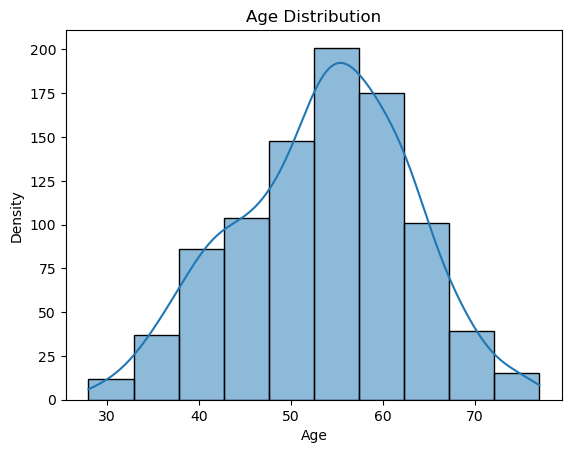

In [29]:
sns.histplot(df['Age'], kde = True, bins = 10)
plot.title('Age Distribution')
plot.xlabel('Age')
plot.ylabel('Density')

### Insight:
- According to my observation, more than 90% of the people belonged to the age group between **40-65 years**.

### Analyzing Resting Blood Pressure

Text(0, 0.5, 'Density')

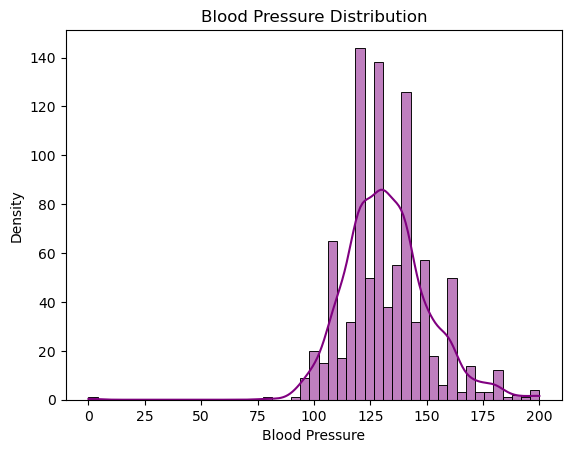

In [28]:
sns.histplot(df['RestingBP'], kde = True, color = 'Purple')
plot.title('Blood Pressure Distribution')
plot.xlabel('Blood Pressure')
plot.ylabel('Density')

### Insights:
- Most people have blood pressure in the range between **120-145 mmHg**

### Analyzing Cholesterol

Text(0, 0.5, 'Density')

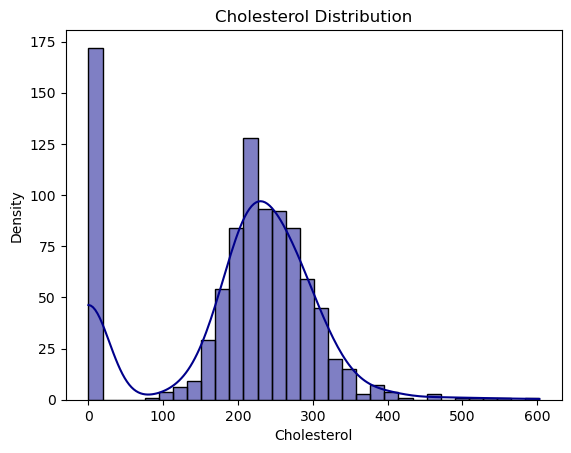

In [27]:
sns.histplot(df['Cholesterol'], kde = True, color = 'darkblue')
plot.title('Cholesterol Distribution')
plot.xlabel('Cholesterol')
plot.ylabel('Density')

### Insights:
- The majority of individuals in the dataset have cholesterol levels ranging between **150–360 mg/dL**, which appears to be within a normal to elevated range.
- An outlier was detected - a cholesterol value of **zero**, which is not physiologically possible and may indicate a **data entry error or missing value encoded as 0**.

### Analyzing Heart Rate

Text(0, 0.5, 'Density')

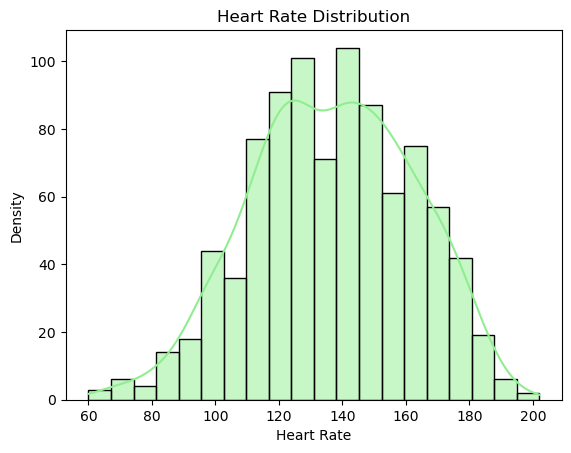

In [26]:
sns.histplot(df['MaxHR'], kde = True, color = 'lightgreen')
plot.title('Heart Rate Distribution')
plot.xlabel('Heart Rate')
plot.ylabel('Density')

### Insights:
- The majority of the individuals have heart rate between **100-180**.

### Analyzing Fasting Blood Sugar
- 0 = Fasting blood sugar < 120 mg/dl (normal)
- 1 = Fasting blood sugar ≥ 120 mg/dl (elevated)

Text(0, 0.5, 'Density')

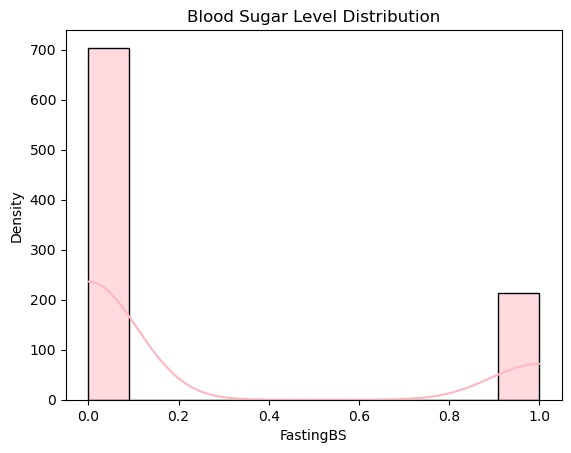

In [25]:
sns.histplot(df['FastingBS'], kde = True, color = 'lightpink')
plot.title('Blood Sugar Level Distribution')
plot.xlabel('FastingBS')
plot.ylabel('Density')

### Insights:
- The data is heavily skewed toward normal blood sugar levels, suggesting most patients in the dataset do not have elevated fasting blood sugar.

### Analyzing by Gender

<Axes: title={'center': 'Gender Ratio'}>

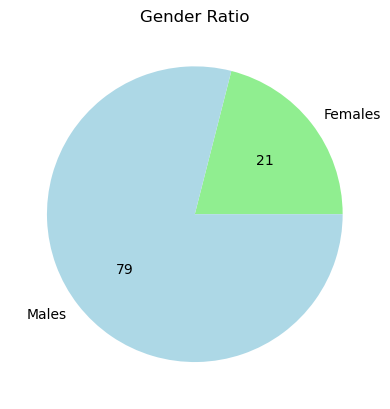

In [16]:
df.groupby('Sex').size().plot(kind = 'pie',
                              autopct = '%.0f',
                              title = 'Gender Ratio',
                              colors = ['lightgreen', 'lightblue'],
                              labels = ['Females', 'Males'])
                              

### Insights:
- As per the gender ratio, **79%** of the people were found to be **males** and **21%** were to be **females**.

### Analyzing different types of chest pain
- ASY: Asymptomatic - No pain, but abnormal test results
- TA: Typical Angina - Classic heart-related chest pain
- NAP: Non-Anginal Pain - Not heart-related pain
- ATA: Atypical Angina - Unusual/atypical heart-related pain

<Axes: title={'center': 'Types of Chest Pain'}>

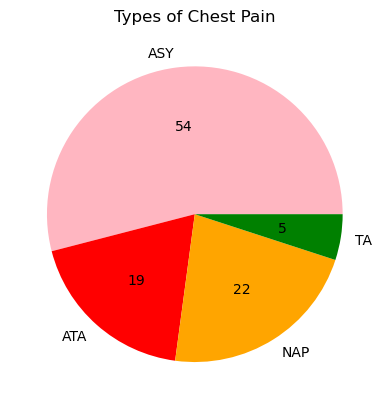

In [35]:
colors = ['lightpink', 'red', 'orange', 'green']
df.groupby('ChestPainType').size().plot(kind = 'pie',
                              autopct = '%.0f',
                              title = 'Types of Chest Pain',
                              colors = colors)

### Insights:
- 54% of the patients experienced no chest pain but may still have heart disease.
- 5% of the patients experienced classic chest pain related to coronary artery disease.
- 22% of the patients experienced pain which was less likely related to heart issues.
- 19% of the patients experience unusual heart related pain.

### Analyzing different types of RestingECG
- Normal: Normal ECG - Heart is electrically normal
- LVH: Left Ventricular Hypertrophy - Heart’s left ventricle is thickened (may indicate high blood pressure or heart strain)
- ST: ST-T Wave Abnormality - Not heart-related pain

<Axes: title={'center': 'Types of ECG Observed'}>

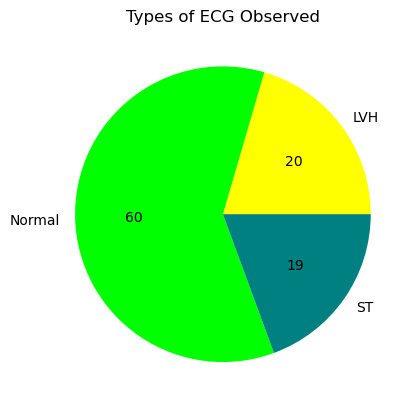

In [31]:
colors = ['yellow', 'lime', 'teal']
df.groupby('RestingECG').size().plot(kind = 'pie',
                              autopct = '%.0f',
                              title = 'Types of ECG Observed',
                              colors = colors)

# Observations:
# 
# 
# 

### Insights:
- 60% of the patients heart was found to be electrically normal.
- Heart's left ventricle of 20% of the patients was found to be thickened which indicates high blood pressure or heart strain.
- 19% of the patients observed ST-T abnormalities which indicates heart stress or any kind of previous damage.

### Analyzing ST_Slope
- ST_Slope refers to the slope of the ST segment in an ECG (Electrocardiogram) reading.
- It helps doctors assess if there's reduced blood flow to the heart (ischemia) or other heart-related problems.
- ST segment = The flat section between the end of the QRS complex and the start of the T wave in an ECG.
- The slope (shape) of this section gives information about how well blood and oxygen are reaching the heart muscles.
- Up: Usually low risk
- Flat: Medium risk
- Down: High risk

<Axes: title={'center': 'Types of ST_Slope'}>

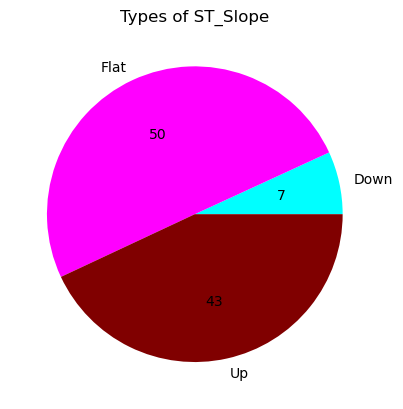

In [33]:
colors = ['cyan', 'magenta', 'maroon']
df.groupby('ST_Slope').size().plot(kind = 'pie',
                              autopct = '%.0f',
                              title = 'Types of ST_Slope',
                              colors = colors)

# Insights:
- **43%** of the patients were at low risk
- **50%** of the patients were at medium risk
- **7%** of the patients were at high risk

## 4. Categorical Analysis

### Categorizing Blood Pressure

C:\Users\Win10\AppData\Local\Temp\ipykernel_8492\4051656496.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['BP_Category'], data=df, palette = 'Set2', y = 'RestingBP')


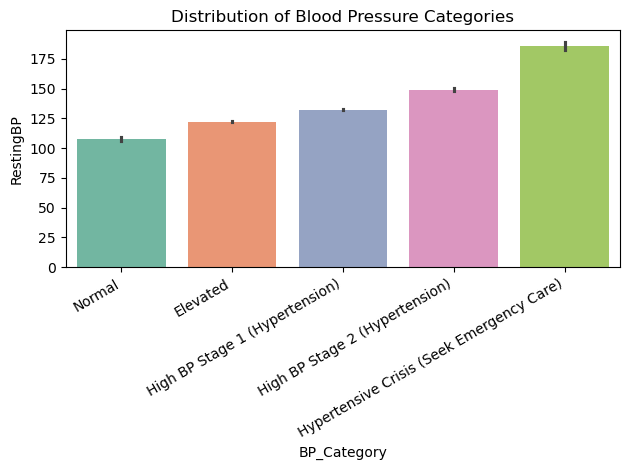

In [17]:
bins = [0 , 120, 130, 140, 180, float('inf')]
labels = ['Normal', 'Elevated', 'High BP Stage 1 (Hypertension)', 'High BP Stage 2 (Hypertension)', 'Hypertensive Crisis (Seek Emergency Care)']

df['BP_Category'] = pd.cut(df['RestingBP'], bins = bins, labels = labels, right = False)
# right = False ensures that the bin includes the left edge but excludes the right

sns.barplot(x = df['BP_Category'], data=df, palette = 'Set2', y = 'RestingBP')
plot.title('Distribution of Blood Pressure Categories')
plot.xticks(rotation = 30, ha = 'right')
plot.tight_layout()

<Axes: title={'center': 'Categorization of Blood Pressure'}, ylabel='count'>

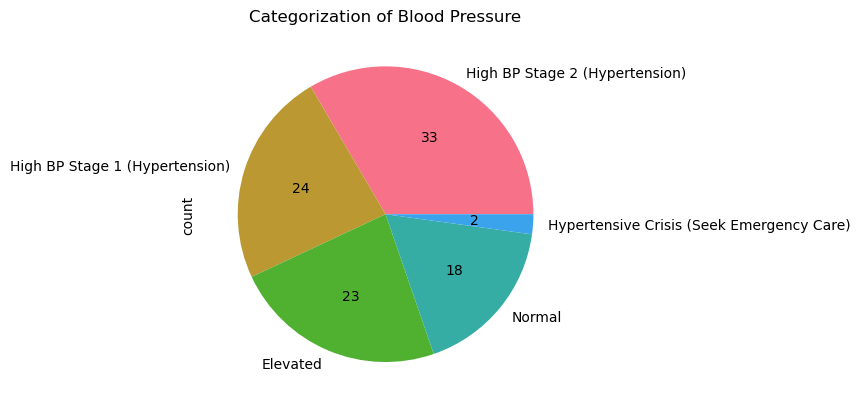

In [18]:
# Using Pie Chart
bins = [0 , 120, 130, 140, 180, float('inf')]
labels = ['Normal', 'Elevated', 'High BP Stage 1 (Hypertension)', 'High BP Stage 2 (Hypertension)', 'Hypertensive Crisis (Seek Emergency Care)']

df['BP_Category'] = pd.cut(df['RestingBP'], bins = bins, labels = labels, right = False)
# right = False ensures that the bin includes the left edge but excludes the right

df['BP_Category'].value_counts().plot(kind = 'pie',
                                      autopct = '%.0f',
                                      colors=sns.color_palette('husl'),
                                      title = 'Categorization of Blood Pressure',
                                      )

### Insights:
- **2%** of the patients are in the stage of Hypertensive Crisis with their blood pressure above 180 mmHG.
- **24%** and 33% of the people are in High BP Stage 1 and Stage 2.
- **23%** and **18%** were found to be in Elevated and Normal stage.

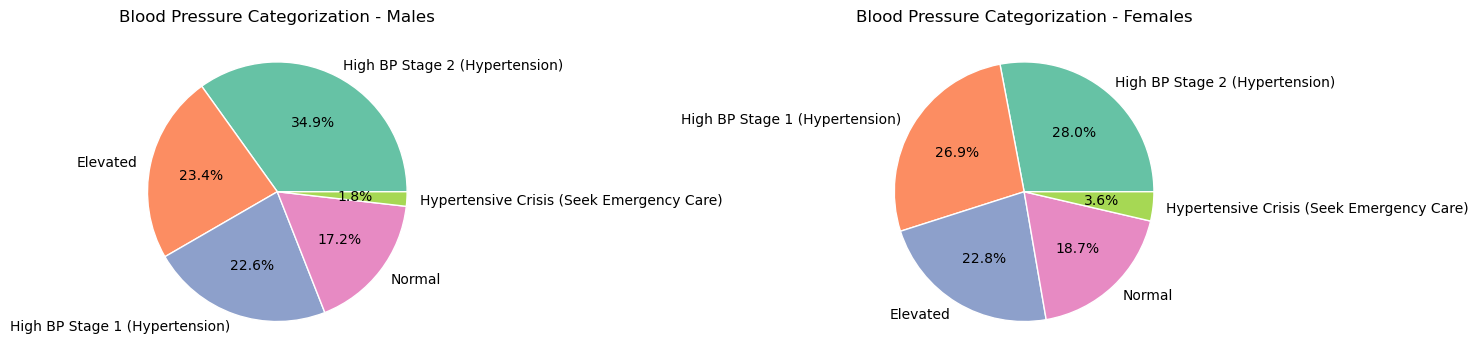

In [19]:
# Blood Pressure Categorization by Gender using pie chart

fig, axes = plot.subplots(1, 2, figsize=(14, 6))

# Male chart
df[df['Sex'] == 'M']['BP_Category'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    ax=axes[0],
    colors=sns.color_palette('Set2'),
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('Blood Pressure Categorization - Males', fontsize=12)
axes[0].set_ylabel('') 

# Female chart
df[df['Sex'] == 'F']['BP_Category'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    ax=axes[1],
    colors=sns.color_palette('Set2'),
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title('Blood Pressure Categorization - Females', fontsize=12)
axes[1].set_ylabel('')

plot.tight_layout()

### Insights:
- In hypertensive crisis stage, 3.6% of women were in need of emergency care as compared to that of 1.8% males.
- The ratio of males was more than that of females in high blood pressure stage 2.
- The rest of the stages were almost equal for both males and females.

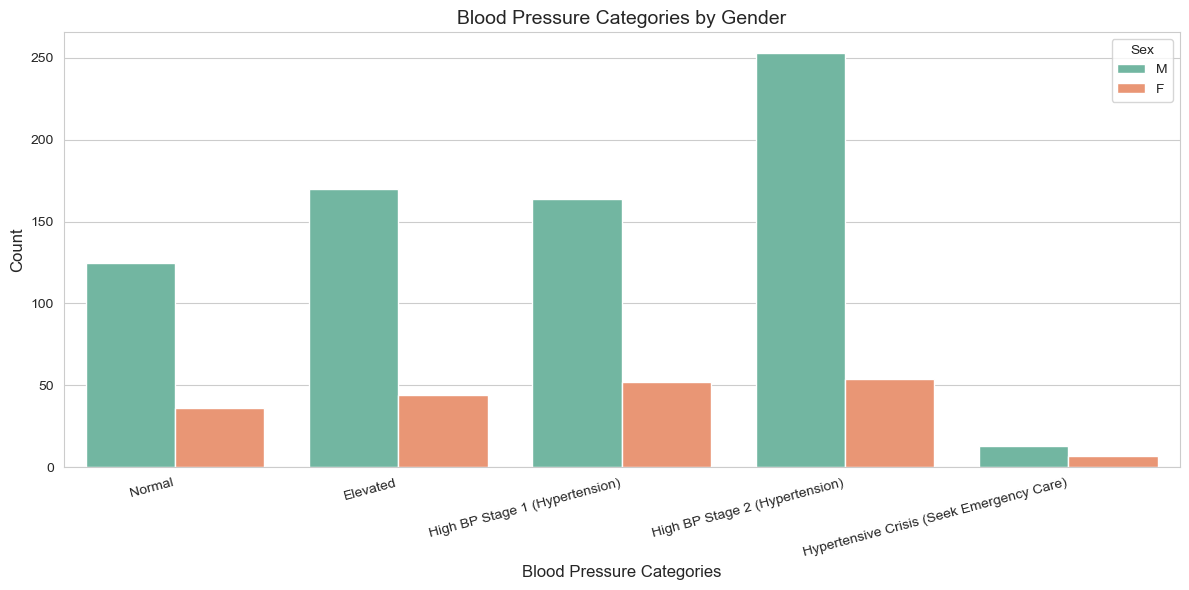

In [20]:
# Blood Pressure Categorization by Gender using Bar plot

plot.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.countplot(data=df, x='BP_Category', hue='Sex', palette='Set2')

plot.title('Blood Pressure Categories by Gender', fontsize=14)
plot.xlabel('Blood Pressure Categories', fontsize=12)
plot.ylabel('Count', fontsize=12)
plot.xticks(rotation=15, ha='right')  
plot.legend(title='Sex')
plot.tight_layout()
plot.show()

### Categorizing Cholesterol level using pie chart
According to guidelines from American Heart Association (AHA) and National Institutes of Health (NHA):
- Less than 200 mg/dL > Desirable
- 200 - 239 mg/dL > Borderline High
- 240 mg/dL and above > High

<Axes: title={'center': 'Categorization of Cholesterol Levels'}, ylabel='count'>

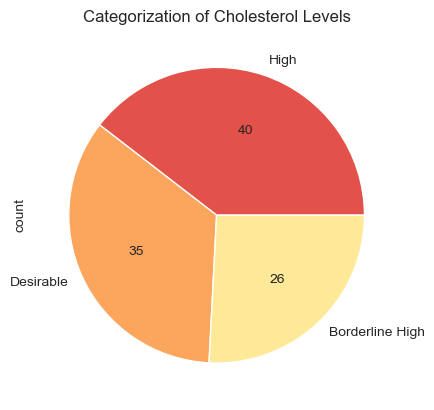

In [21]:
bins = [0, 200, 240, float('inf')]
labels = ['Desirable', 'Borderline High', 'High']

df['Cholesterol_Category'] = pd.cut(df['Cholesterol'], bins = bins, labels = labels, right = False)
# right = False ensures that the bin includes the left edge but excludes the right

df['Cholesterol_Category'].value_counts().plot(kind = 'pie',
                                               autopct = '%.0f',
                                               colors = sns.color_palette('Spectral'),
                                               title = 'Categorization of Cholesterol Levels'
                                              )

### Insights:
- 35% of the patients are in the desirable range of cholesterol level.
- 26% of the patients are in the range of borderline high.
- 40% of them are in high risk stage.

### Cholesterol Level Categorization by Gender using pie chart

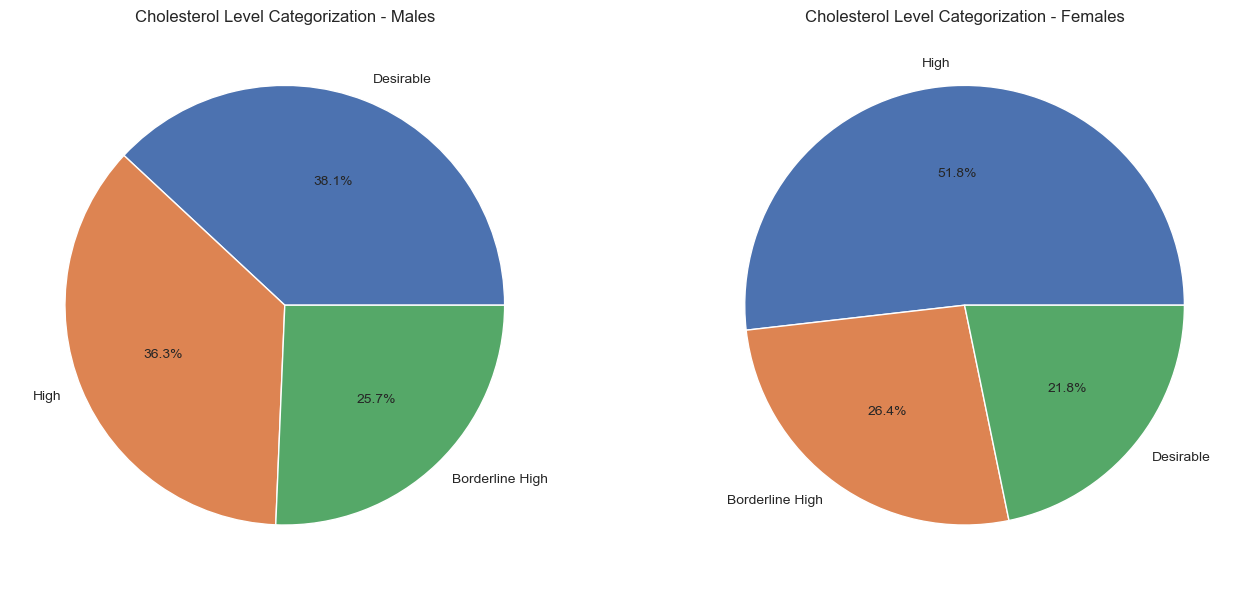

In [22]:
fig, axes = plot.subplots(1, 2, figsize=(14, 6))

# Male chart
df[df['Sex'] == 'M']['Cholesterol_Category'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    ax=axes[0],
    colors=sns.color_palette('deep'),
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('Cholesterol Level Categorization - Males', fontsize=12)
axes[0].set_ylabel('') 

# Female chart
df[df['Sex'] == 'F']['Cholesterol_Category'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    ax=axes[1],
    colors=sns.color_palette('deep'),
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title('Cholesterol Level Categorization - Females', fontsize=12)
axes[1].set_ylabel('')

plot.tight_layout()

### Insights:
- Most males have cholesterol levels in the desirable or high range, with relatively fewer in the borderline high range.
- A significantly higher percentage of females have high cholesterol compared to males.
- The proportion of females with desirable cholesterol levels is much lower than in males.
- Males show a healthier cholesterol distribution, with more individuals in the desirable range.

### Blood pressure categorization across all age groups
- SQL query was used to perform the categorization across blood pressure and ages.
- Query:
  SELECT
	Age_Group,
    BP_Category,
    COUNT(*) AS Total
    FROM(
		SELECT 
			CASE
			WHEN Age BETWEEN 18 AND 29 THEN '18-29'
            WHEN Age BETWEEN 30 AND 39 THEN '30-39'
            WHEN Age BETWEEN 40 AND 49 THEN '40-49'
            WHEN Age BETWEEN 50 AND 59 THEN '50-59'
            WHEN Age BETWEEN 60 AND 69 THEN '60-69'
            ELSE '70+'
		END AS Age_Group,
        CASE
			WHEN RestingBP < 120 THEN 'Normal'
			WHEN RestingBP BETWEEN 120 AND 129 THEN 'Elevated'
			WHEN RestingBP BETWEEN 130 AND 139 THEN 'High BP Stage 1'
			WHEN RestingBP BETWEEN 140 AND 179 THEN 'High BP Stage 2'
			WHEN RestingBP >= 180 THEN 'Hypertensive Crisis'
			ELSE 'Unknown' 
		END AS BP_Category
FROM heart) AS Categorized
GROUP BY Age_Group, BP_Category
ORDER BY Age_Group   

In [23]:
df1 = pd.read_csv('AgeGroupBPCategorization.csv')

In [24]:
df1.head()

,Age_Group,BP_Category,Total
0,18-29,Elevated,1
1,18-29,High BP Stage 1,2
2,18-29,High BP Stage 2,1
3,30-39,Elevated,22
4,30-39,High BP Stage 1,14


In [25]:
df1.rename(columns={'Total': 'Count'}, inplace = True)

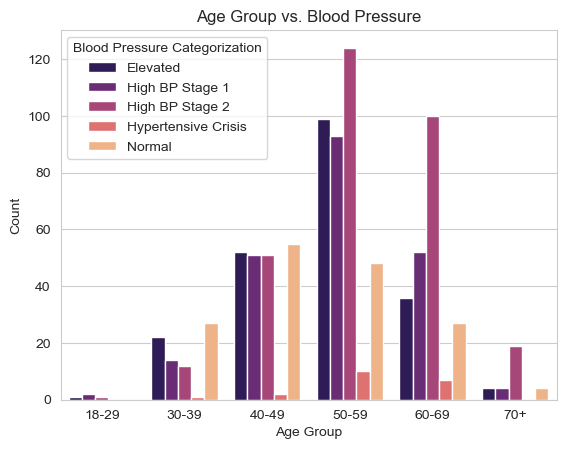

In [26]:
sns.barplot(x = 'Age_Group', y = 'Count', hue = 'BP_Category', data=df1, palette = 'magma')
plot.title('Age Group vs. Blood Pressure')
plot.xlabel('Age Group')
plot.legend(title = 'Blood Pressure Categorization')

### Insights:
- Blood pressure worsens with age — older age groups have higher prevalence of Hypertension (Stage 1 & 2).
- The 50–59 age group is a critical point, where most categories peak, especially Stage 2 hypertension.
- People in the age group of 40-49 having normal blood pressure are more as compared to that of younger age group 30-39.

## 5. Correlation

### Comparing Heart Disease with that of Gender and Age

C:\Users\Win10\AppData\Local\Temp\ipykernel_8492\2385026536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df['HeartDisease'], y = df['Age'], ax=axes[0], palette = 'Set2')
C:\Users\Win10\AppData\Local\Temp\ipykernel_8492\2385026536.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df['HeartDisease'], y = df['Sex'], ax=axes[1], palette = 'Set3')


Text(0.5, 1.0, 'Heart Disease vs. Sex')

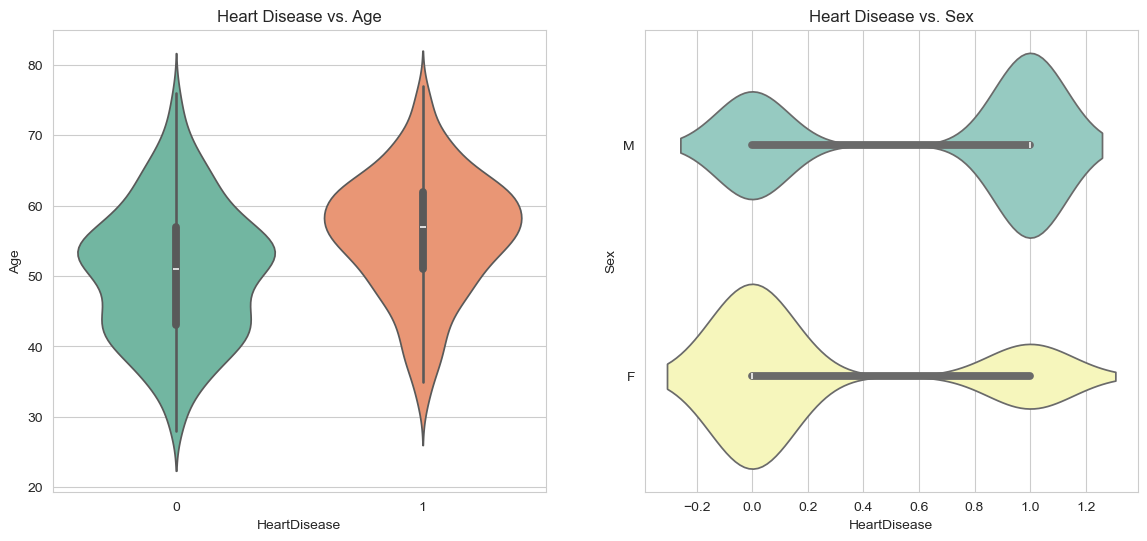

In [27]:
fig, axes = plot.subplots(1, 2, figsize=(14, 6))

# Heart Disease vs. Age
sns.violinplot(x = df['HeartDisease'], y = df['Age'], ax=axes[0], palette = 'Set2')
axes[0].set_title('Heart Disease vs. Age')

# Heart Disease vs. Sex
sns.violinplot(x = df['HeartDisease'], y = df['Sex'], ax=axes[1], palette = 'Set3')
axes[1].set_title('Heart Disease vs. Sex')    

### Insights:
Heart Disease vs. Age
- More people between the age group of 50-70 are having heart disease while there are other set of people between the age group of 30-70 suffering from no heart disease.
- Average age of the people suffering from heart disease are between 56-57 years.
- Average age of the people not suffering from heart disease is approximately 51-52 years.
- Age is one of the strong factor to the heart diease. As it can be seen , older adults tend to have higher chances of heart disease.

### Comparing Heart Disease with Resting Blood Pressure

Text(0.5, 1.0, 'Heart Disease vs. RestingBP')

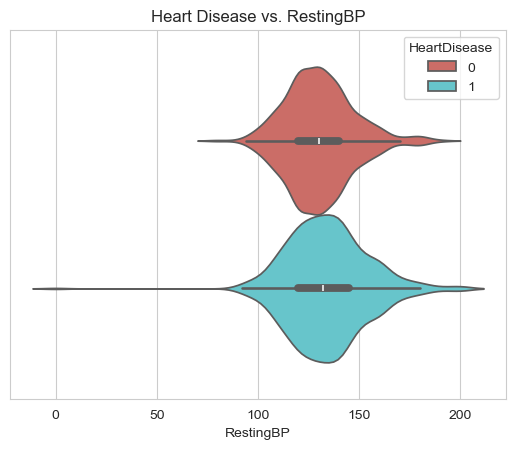

In [28]:
sns.violinplot(hue = df['HeartDisease'], x = df['RestingBP'], palette = 'hls')
plot.title('Heart Disease vs. RestingBP')

### Insights:
- Both groups mostly fall between 90 to 150 mmHg which means Resting BP alone is not a strong separator between people with and without heart disease.
- The heart disease group shows slightly a higher average as compared to the non-disease group.
- The peak density for heart disease seems to be around 135-140 mmHg while for non-heart disease, it is around 125-130 mmHg.

### Comparing Heart Disease with Cholesterol

Text(0.5, 1.0, 'Heart Disease vs.Cholesterol')

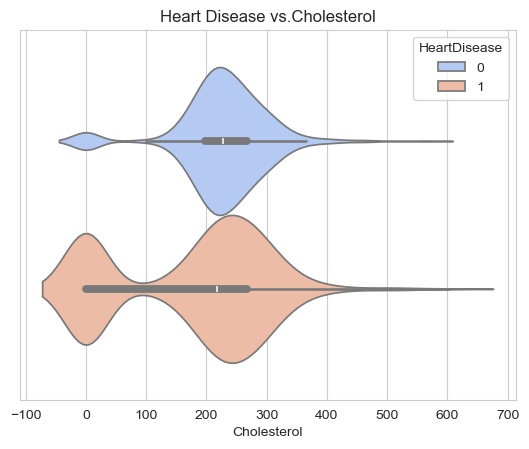

In [29]:
sns.violinplot(hue = df['HeartDisease'], x = df['Cholesterol'], palette = 'coolwarm')
plot.title('Heart Disease vs.Cholesterol')

### Insights:
- Both Heart Disease and No Heart Disease groups have cholesterol values mostly between 150 and 350 mg/dL as cholesterol levels overlap heavily for both the groups.
- Even people with low cholesterol (<200 mg/dL) can have heart disease, and people with high cholesterol (>300 mg/dL) can sometimes be without heart disease.
- Since, there's a lot of overlap which means cholesterol is not a striong single predictor here.
- There are some outliers as there can't be individuals with zero cholesterol.
- Cholesterol alone does not clearly differentiate heart disease vs no heart disease.
- Both groups have a similar central cholesterol range (~200-250 mg/dL).

### Comparing Heart Disease with Chest pain

Text(0.5, 0, 'Types of Chest Pain')

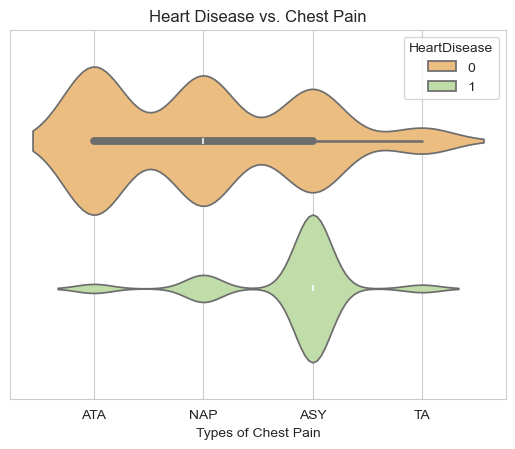

In [30]:
sns.violinplot(x = df['ChestPainType'], hue = df['HeartDisease'], palette = 'Spectral')
plot.title('Heart Disease vs. Chest Pain')
plot.xlabel('Types of Chest Pain')

### Insights:
- ASY (Asymptomatic) chest pain is strongly associated with heart disease as the distribution peaks sharply at ASY.
- The widest violin shapes indicates the highest number of cases.
- ATA (Atypical Angina) and NAP (Non-Anginal Pain) are mostly associated with no heart disease.
- People without heart disease show a wider and more even distribution across chest pain types.
- ASY (Asymptomatic) chest pain could be a red flag for diagnosing heart disease while ATA and NAP may be less indicative of heart disease.

### Comparing Heart Disease with Exercise Angina

Exercise angina is a type of chest pain or discomfort that occurs during physical activity due to reduced blood flow to the heart muscle.

Text(0.5, 0, 'Exercise Angina')

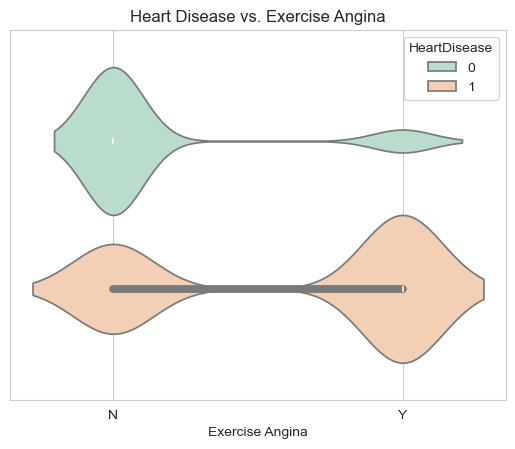

In [31]:
sns.violinplot(x = df['ExerciseAngina'], hue = df['HeartDisease'], palette = 'Pastel2')
plot.title('Heart Disease vs. Exercise Angina')
plot.xlabel('Exercise Angina')

### Insights:
- There appears to be a positive association between exercise-induced angina and heart disease.
- Individuals with exercise-induced angina (Y) are more likely to have heart disease while those without angina are more likely to be free of heart disease.

### Comparing Heart Disease with ST_Slope

Text(0.5, 0, 'ST_Slope')

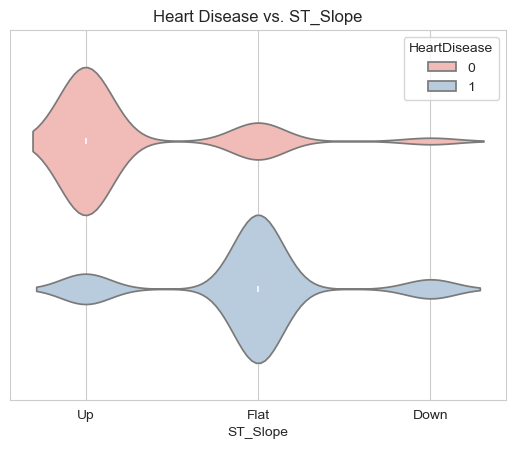

In [32]:
sns.violinplot(x = df['ST_Slope'], hue = df['HeartDisease'], palette = 'Pastel1')
plot.title('Heart Disease vs. ST_Slope')
plot.xlabel('ST_Slope')

### Insights:
- Flat ST slopes are strongly associated with the presence of heart disease.
- Up ST slopes dominated by individuals without heart disease.
- ST slope can be a valuable predictor in diagnostic models for heart disease.

## 6. Correlation Using All Factors

Text(0.5, 1.0, 'Coorelation Heatmap')

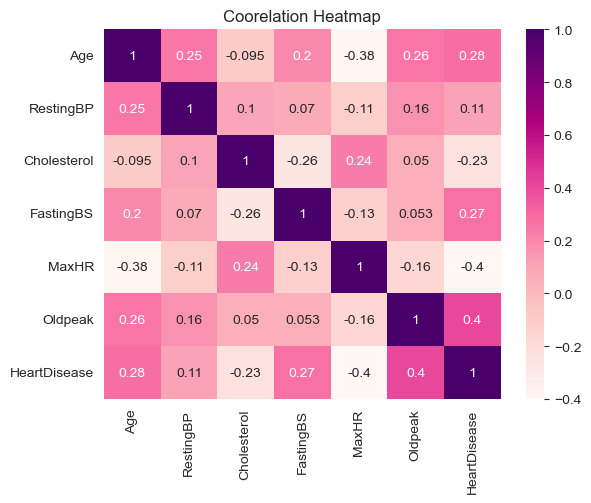

In [33]:
# Dropping non-numeric columns (corr function cannot be performed on string values)
numeric_df = df.select_dtypes(include='number')
# 

# Plotting using only heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdPu')
plot.title('Coorelation Heatmap')

In [34]:
numeric_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


### Insights:
1. Positive Correlation with Heart Disease (i.e., as these increase, heart disease likelihood tends to increase):
- Oldpeak: 0.40 → Strongest positive correlation with heart disease.
- Age: 0.28
- RestingBP: 0.11 (weak)

These variables tend to increase with the presence of heart disease.

2. Negative Correlation with Heart Disease (i.e., as these increase, heart disease likelihood tends to decrease):
- MaxHR: -0.40 → Strong negative correlation.
- Cholesterol: -0.23

Surprisingly, individuals with higher maximum heart rate and cholesterol are less likely to have heart disease, based on this data.

3. No/Weak Correlation with Heart Disease:
- RestingBP: 0.11
- Cholesterol: -0.23
- FastingBS: 0.27 (borderline weak/moderate)

These values are closer to zero and thus show weak or negligible correlation.

4. Other notable correlations (not with heart disease directly):
- Age vs MaxHR: -0.38 → As age increases, max heart rate tends to decrease.
- MaxHR vs HeartDisease: -0.40 → People with lower max heart rate tend to have more heart disease.
- Oldpeak vs HeartDisease: 0.40 → The strongest direct indicator for heart disease in this dataset.

### Finding correlation between Age and Maximum Heart Rate

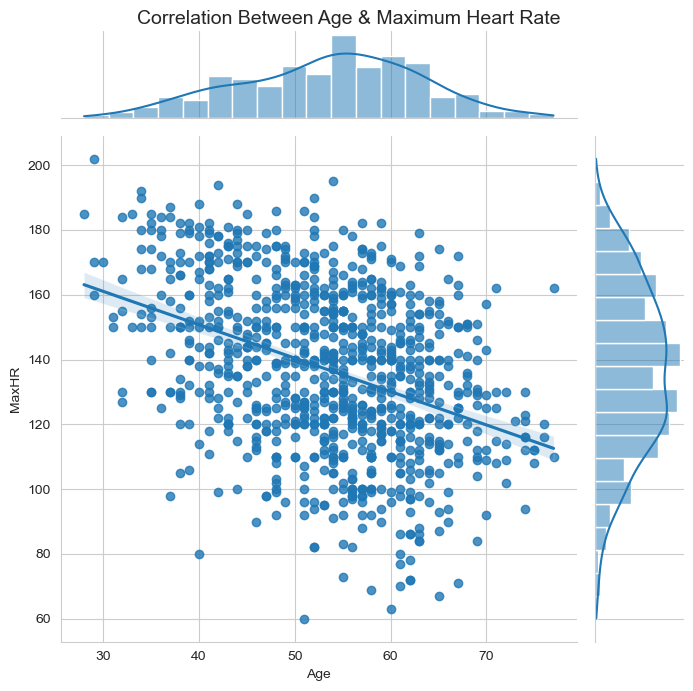

In [35]:
AgeHR = sns.jointplot(x = df['Age'], y = df['MaxHR'], kind='reg', height=7)
AgeHR.fig.suptitle('Correlation Between Age & Maximum Heart Rate', fontsize=14)
AgeHR.fig.subplots_adjust(top=0.95)

### Insights:
- There is a negative correlation as when the age increases, the heart rate tends to decrease. 
- High variance can be observed as there is significant spread in maximum heart rate in each age group. This can be due to fitness levels, medications or underlying heart conditions.
- Outliers can be observed as there are individuals in their 50s & 60s with low heart rates
- Outliers can be observed as there are older individuals showing higher than expected maimum heart rate.

### Correlating between each factors using pairplot

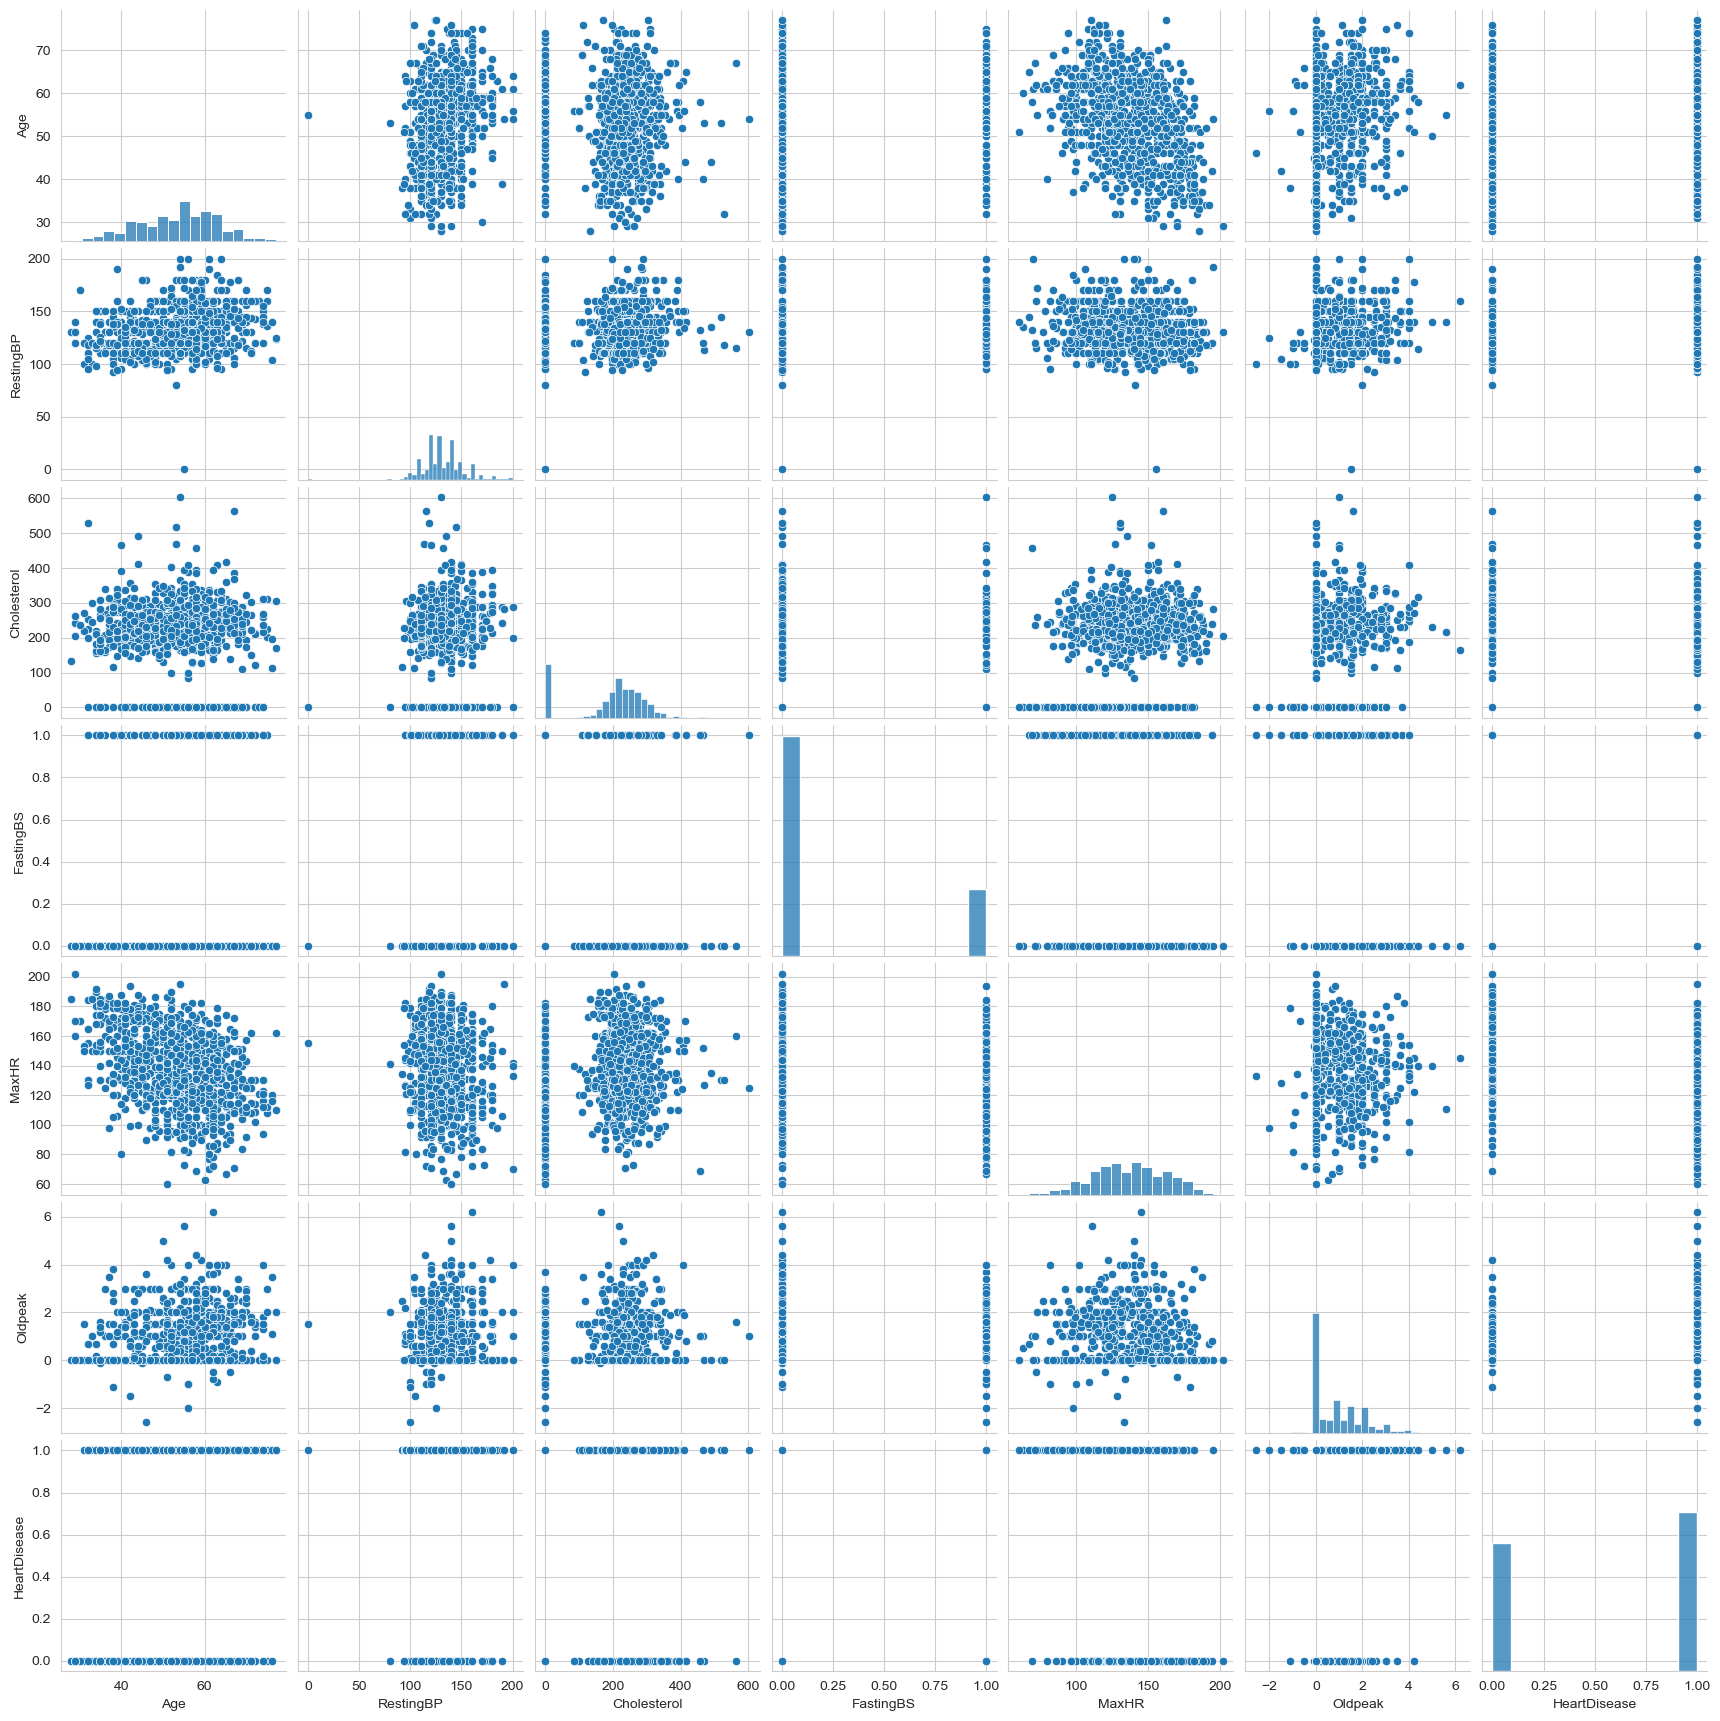

In [36]:
sns.pairplot(df)

## 7. Conclusion

This exploratory data analysis on the heart disease dataset provided several important observations:

- **Age**, **Fasting Blood Sugar**, and **Oldpeak** showed a positive correlation with the presence of heart disease, suggesting they are potentially important risk indicators.
- **Maximum Heart Rate (MaxHR)** had a strong **negative correlation** with heart disease, indicating that individuals with lower MaxHR were more likely to be diagnosed.
- **Oldpeak** emerged as the **strongest positive predictor** of heart disease in the dataset.
- Some surprising results were found, such as a **negative correlation between cholesterol and heart disease**, which may be due to data imbalance, medication usage, or lifestyle variations not captured in the dataset.
- The relationship between **Age and MaxHR** confirms known medical insights, as age increases, the maximum heart rate typically decreases.

While this analysis offers meaningful trends, it's important to note that:
- Correlation does not imply causation
- The dataset might not represent all age groups or clinical variations equally
- Further analysis using statistical models or machine learning could provide more predictive insights

This project helped in understanding how structured analysis using Python libraries (Pandas, Seaborn, Matplotlib) can uncover insights from health data, potentially guiding early risk detection and decision making.

